# Introduction to regression models

Import relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [4]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

In [5]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory data analysis

Explore the dataset. Visualize the data and try to understand what is the number of observations, where are the features and which is the target.

In [12]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


X = quality, ph, fixed acidity (quantitative or qualitative Features)
Y = residual sugar ou total sulfur dioxide (quantitative variable Target)

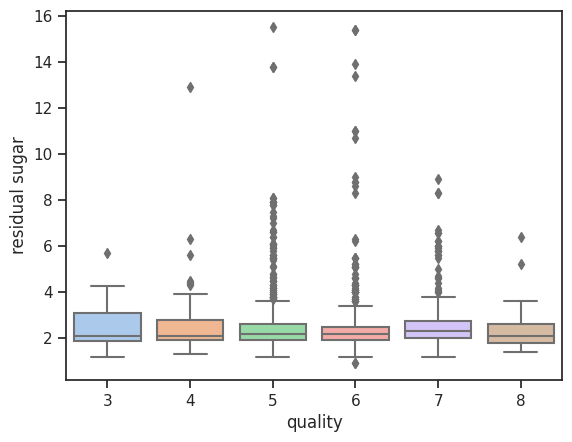

In [47]:
graph1 = sns.boxplot(data=wine_df, x="quality", y="residual sugar")
plt.show()

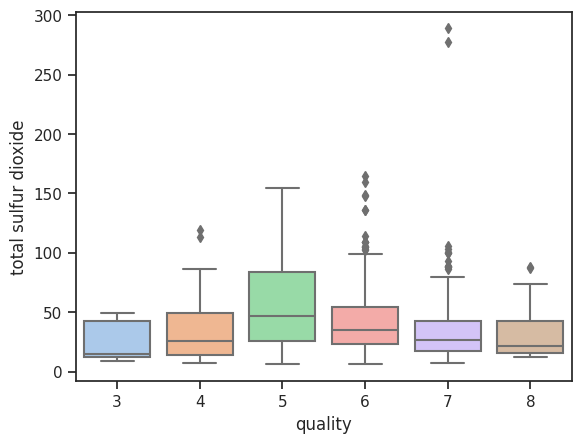

In [48]:
graph2 = sns.boxplot(data=wine_df, x="quality", y="total sulfur dioxide")
plt.show()

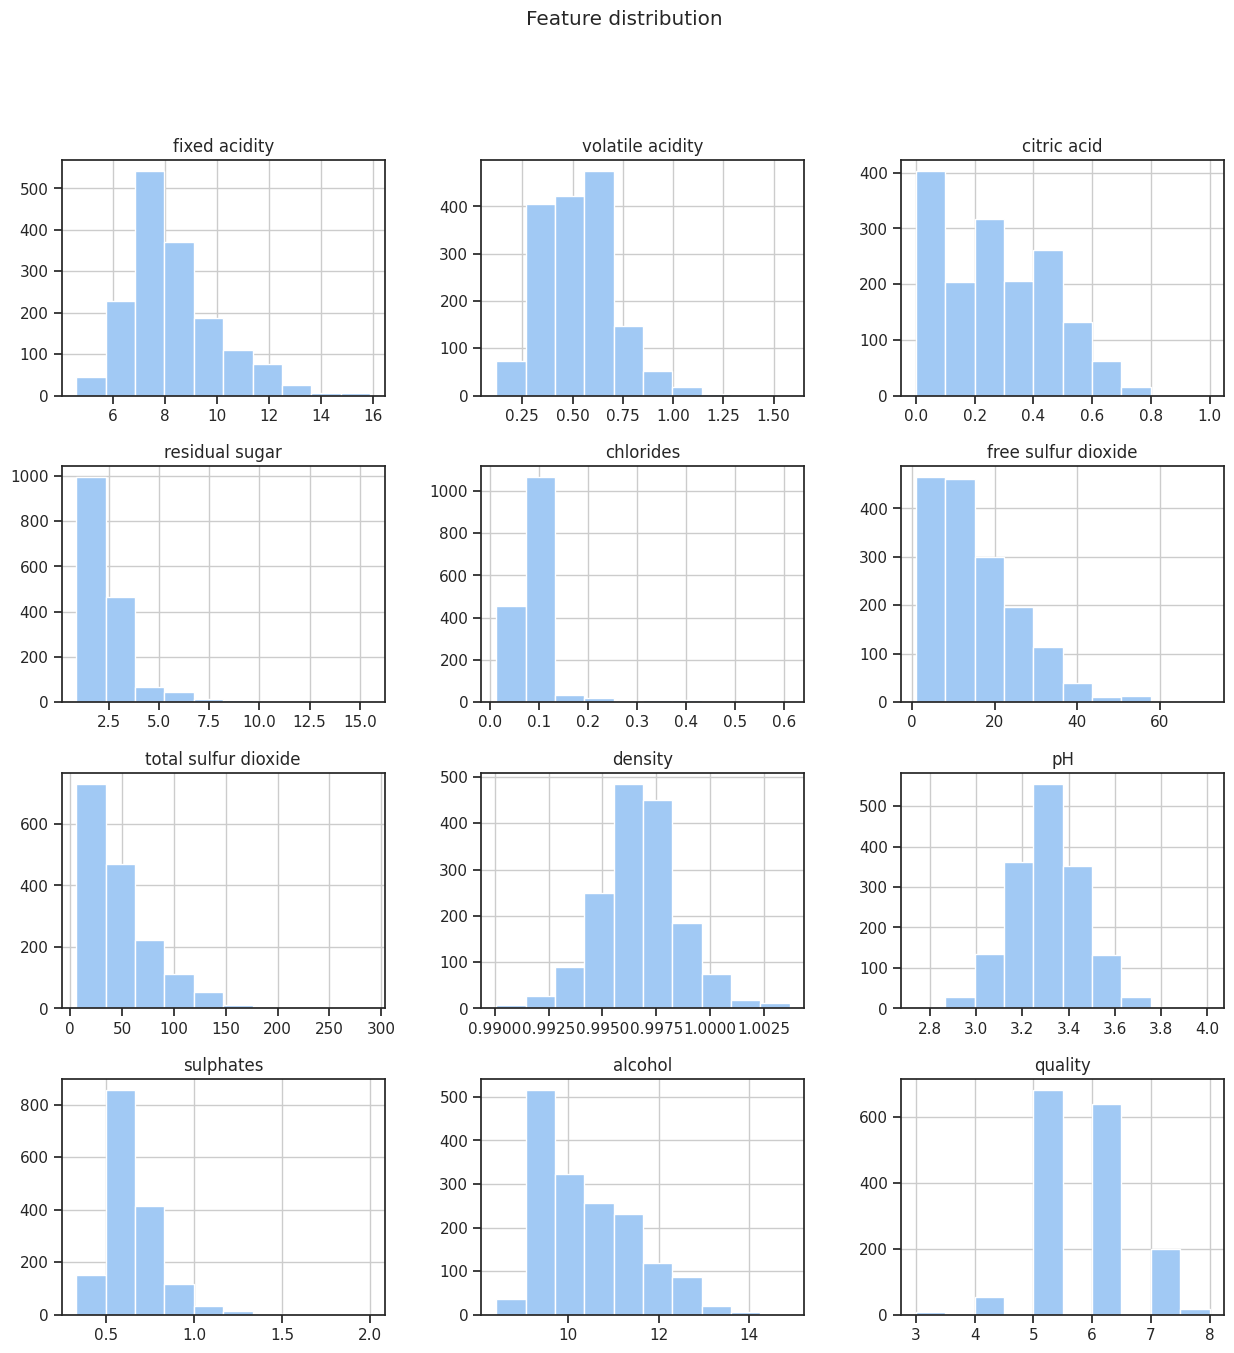

In [49]:
wine_df.hist(figsize=[15,15])
plt.suptitle("Feature distribution")
plt.show()

## Create your own linear model

In [55]:
wine_sample = wine_df.sample(n=100, random_state=1)
wine_sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,8.8,0.410,0.64,2.20,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
1283,8.7,0.630,0.28,2.70,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
408,10.4,0.340,0.58,3.70,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
1281,7.1,0.460,0.20,1.90,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1118,7.1,0.390,0.12,2.10,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6
1143,7.0,0.220,0.30,1.80,0.065,16.0,20.0,0.99672,3.61,0.82,10.0,6
1215,8.8,0.270,0.46,2.10,0.095,20.0,29.0,0.99488,3.26,0.56,11.3,6
181,8.9,0.610,0.49,2.00,0.270,23.0,110.0,0.99720,3.12,1.02,9.3,5
1186,6.6,0.800,0.03,7.80,0.079,6.0,12.0,0.99630,3.52,0.50,12.2,5
1252,7.1,0.720,0.00,1.80,0.123,6.0,14.0,0.99627,3.45,0.58,9.8,5


Get 100 samples with random state (seed) = 1

Plot pH in function of fixed acidity

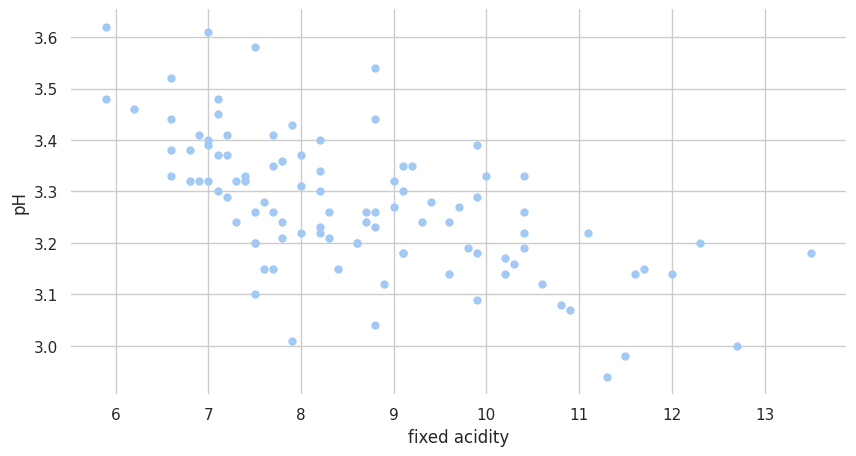

In [66]:
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="fixed acidity", y="pH",
                sizes=(1, 8), linewidth=0,
                data=wine_sample, ax=ax)
plt.show()

What can you say about pH and fixed acidity? are they correlated ? 

Fixed acidity is correlated 

Try to find a linear model by hand. plot it with the sample set

Hint: define an intercept and a slope. Then, plot it graphically

y = a * x + b, where a is slope and b is intercept

what is the best linear model you can find ? try to find the optimal intercept and slope by your own

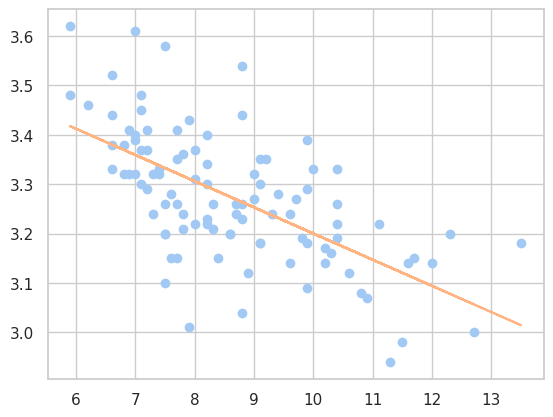

In [103]:
x = wine_sample["fixed acidity"]
y = wine_sample["pH"]
plt.plot(x, y,'o')
a= -0.053
b= 3.73
plt.plot(x, a*x +b)

Hint: create your own algorithm to find the best intercept and slope

Help: if you lack of inspiration, you can try to implement the following algorithm:

1) choose a random $b_1$ and fix it. Then calculate the best $b-0$ that minimize the error of the prediction
- define X (fixed acidity) and y (pH)
- define a $b_1$ fixed
- define a range of $b_0$ to test
- define a function predict(x,b0,b1) that returns the predictions (y_pred)
- define a function calculate_error(y, y_pred) that estimate the sum of squared errors $e = \Sigma_i^{100}|y_i - y_{pred_i}|^2$
- for each $b_0$, find the $b_0 min$ that minimize $e$

2) fix $b_0$ with the $b_0 min$ you find before. Then, calculate the best $b_1 min$ that minimizes the error by following the same steps as before

3) fix $b_1$ with the new $b_1 min$ you found. Then, calculate a new $b_0 min$ that minimizes the error by following the same steps

4) reiterate on 2

In [ ]:
randb1 = np.random.uniform(-10, 100, size =5 )
randb0 = np.random.uniform(-10, 100, size =5)

X = wine_sample["fixed acidity"]
y = wine_sample["pH"]

fixb1 = 6 

def predict(x,b0,b1):
    
    return 

Compare to seaborn regplot

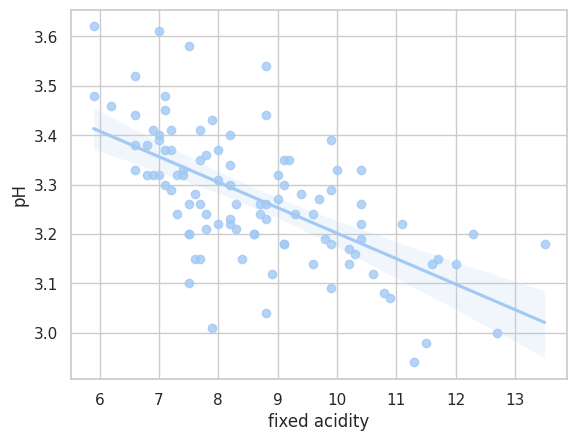

In [110]:
sns.regplot(y='pH', x='fixed acidity', data=wine_sample)
plt.show()

In [ ]:
# plot your linear model with regplot and compare

How far is your linear model from seaborn model?

How do you evaluate the performance of your linear models at each iteration ?

Try to create a method where each time you define a slope or intercept, you reduce the error of the model. Then, you iterate to find the best model

Hint: choose a fixed intercept, find the slope that reduce the error of the model. Then keep that slope, find the new intercept that reduce the error of the model ...

How many iterations did you tried ? what are the best intercept and slope you found? Are you closer to the seaborn linear model ?  

According to you ... is this the OLS method ? can you describe with your own words, how it works? how different is from your method ?

Compare with the Linear regression used in scikit learn

In [ ]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = sample_wine_df[['fixed acidity']]
y = sample_wine_df['pH']

# Train the model on the data
model.fit(X, y)

# check results
# model's slope (a)
print(model.coef_)

# model's intercept (b)
print(model.intercept_)

Are you close to these values ?

How do you interpret these values? What do they say about the pH and fixed acidity?

## inference analysis

Get a new sample of 100 with different random state (seed) = 60

Try to plot a regplot with the sckitlearn coefficients, your best coefficient calculated before. Does your best linear model (sklearn) fit with this new sample set ?  Why ?

Hint: read about what is overfit?

How can you solve the problem ?

# Predict wine quality - regression problem

## Simple Linear regression

Let's try to create a new linear regression. This time, try to find the best model to predict quality in function of pH

Follow the same steps as before: 
- choose a random sample with fixed seed
- use seaborn to see the linear model in this sample
- calculate the best linear regression
- check if the model fits with a new sample

How good is this model performing? What is the error? is it low or high ?

### Using Holdout method 

Let's use the train split method to divide the dataset in 70% train set and 30% test set. This time we will use another feature. Let's try with fixed acidity this time

In [ ]:
from sklearn.model_selection import train_test_split

# Choose your feature and your target
X = sample_wine_df[['fixed acidity']]
y = sample_wine_df['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

Is this score good or bad? What does it means? 

Try to use regplot to compare with your new model and understand graphically what is happening for the train and test set. you should try two graphics: (one using the X_train,y_train and another one using X_test, y_test)


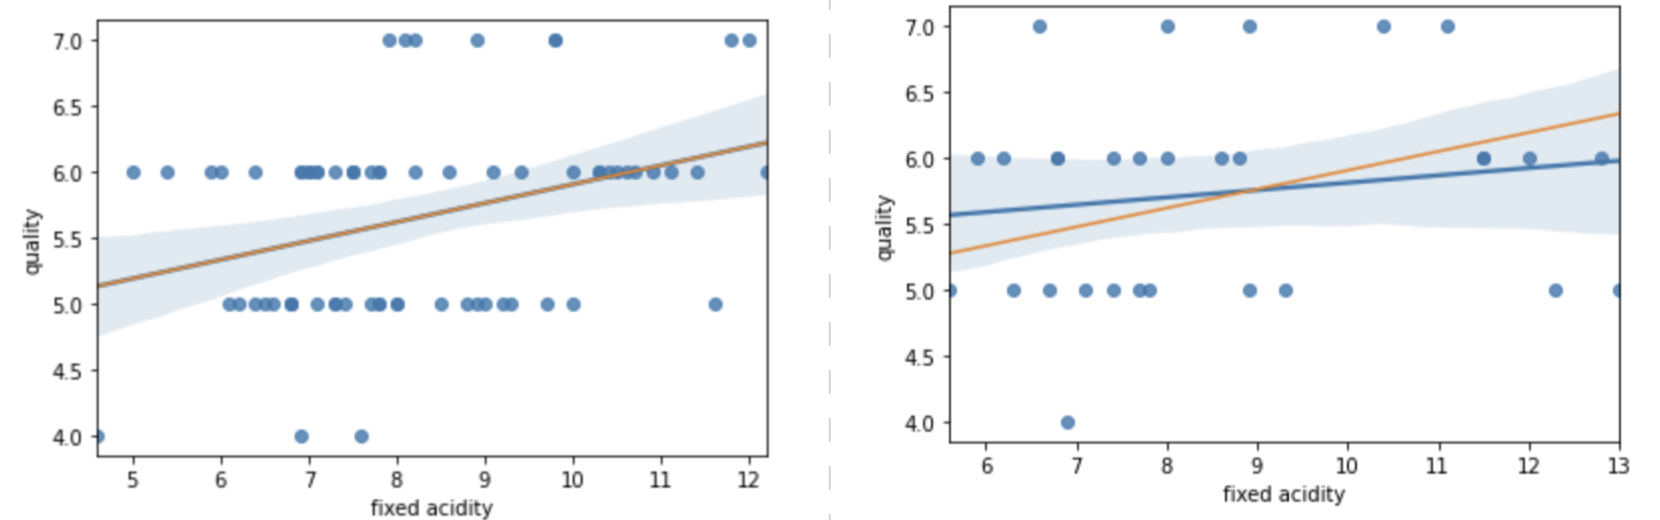

Try another feature. Replace your X with volatile acidity, alcohol ...

Which feature increases this value? 

Do you think you can do better ?

## Multi linear regression

Let's add multiple features in the regression model. Then create a new model and compare your results with Simple regression. Is it better or worst? 

In [ ]:
X = sample_wine_df[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]

Try with all the features (all without column quality of course). 

Create a new model and compare with the last one. Is it better? Why? 



If you add the column quality in the variable X, what would happen ? 

Hint: read about **data leakage**

Do you think that there are features that are not helping to increase the performance? Which ones do you suspect? 

Do you know a method to identify them? 

How can you find the best combination of features to increase the performance of the model?

# Predict wine quality - classification problem

## convert quality column in 2 classes

Create a classification version (good or bad) of target variable (quality). To do so, let's consider that the wine with quality equal of higher than 7 is good quality and the rest bad quality. 

You can call the new column goodquality

In [ ]:
# Create Classification version of target variable


# Separate feature variables and target variable



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


How many samples are considered as good and how many are bad? Is this balanced

## Simple Logistic regression

Try to create a first logistic regression model from a sample

In classification, how do you evaluate the performance of the model ?

hint: read more about classification_report from scikit learn

Try different pair of data sets: (pH, goodquality), (fixed acidity, goodquality), (alcohol, goodquality) 

Which pair performs better?

## Multi logistic regression

Add new features to the model, try to find the best model reducing the error. 

Use everything you learned so far and good luck :)